## 1 Вводные задачи

1.1. (уровень сложности: низкий)

Исправьте функцию distance. Добавьте документацию к функции в виде docstring-строки. Укажите примеры в формате doctest. Примеры должны охватывать граничные случаи. Протестируйте программу с помощью вызова модуля doctest. Перенесите примеры в отдельный файл и снова протестируйте программу.

In [ ]:
def distance(x1, y1, x2, y2):
    """
    Реализация вычисления расстояния между точками (x1, y1) и (x2, y2)
    >>> distance(4, 4, 4, 4)
    0.0
    >>> distance(1, 2, 4, 6)
    5.0
    """
    return ((x2 - x1) ** 2 + (y2 - y1) ** 2) ** 0.5

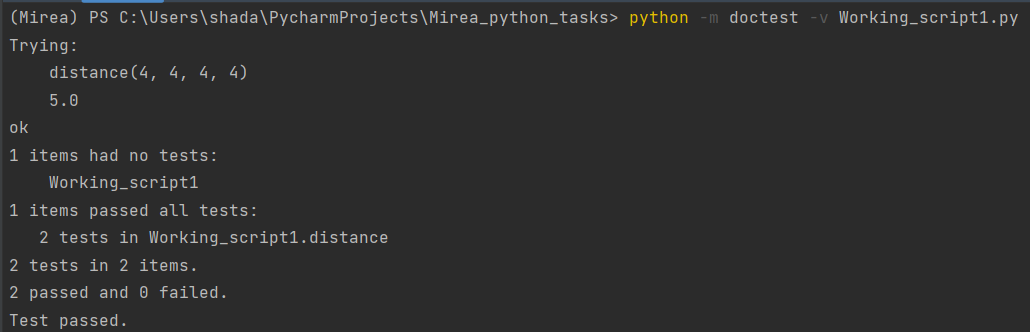

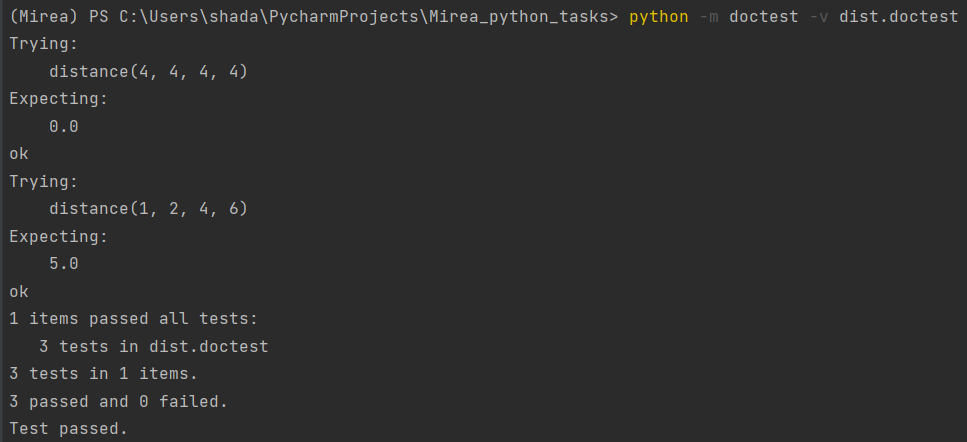

1.2. (уровень сложности: высокий)

Добавьте к функции сортировки тестирование на случайных данных. Исправьте ошибки в функции.

Напишите к функции сортировки отдельную функцию-спецификацию в виде набора assert'ов. Спецификация должна исчерпывающим образом описывать задачу сортировки (без привлечения готовых функций сортировки), иными словами – для общего случая нельзя придумать такое искажение кода сортировки, которое будет принято спецификацией.

In [ ]:
def bucketsort(arr, max_num):
    counts = [0] * (max_num + 1)
    for x in arr:
        counts[x] += 1

    sorted_arr = []
    for i in range(max_num + 1):
        sorted_arr.extend([i] * counts[i])

    return sorted_arr


def test_bucket():
    assert bucketsort([], 0) == []
    assert bucketsort([0, 0, 0], 0) == [0, 0, 0]
    assert bucketsort([5, 5, 5], 5) == [5, 5, 5]
    assert bucketsort([4, 2, 0, 6], 6) == [0, 2, 4, 6]
    assert bucketsort([4, 2, 1, 1, 0, 6, 5, 6], 6) == [0, 1, 1, 2, 4, 5, 6, 6]
    print("It works")


test_bucket()

It works


1.3. (уровень сложности: средний)

Реализуйте конструкцию raises с помощью менеджера контекста в духе таковой из pytest.

Пример использования:

with raises(MealyError) as e:
    ...

In [ ]:
from contextlib import contextmanager


@contextmanager
def raises(error):
    try:
        yield
    except error:
        pass
    finally:
        pass


with raises(ZeroDivisionError) as e:
    print(1 / 5)
    print(1 / 0)

0.2


## 2 Библиотеки pytest и coverage

2.1. (уровень сложности: средний)

Научитесь работать с модулем pytest. Выберите одну из программ, содержащих ошибки. Создайте отдельный файл для тестирования, в который поместите тестирующие функции (не менее двух). Упростите код с помощью добавления fixture-функций. Добавьте параметризацию.

In [ ]:
class BankAccount:
    def __init__(self, account_number, balance=0):
        self.account_number = account_number
        self.balance = balance

    def deposit(self, amount):
        self.balance += amount
        return f"{amount} средств успешно зачислены на счет {self.account_number}"

    def withdraw(self, amount):
        self.balance -= amount
        return f"{amount} средств успешно сняты с счета {self.account_number}"

    def check_balance(self):
        return f"Баланс счета {self.account_number}: {self.balance}"


# Файл с тестированием
import pytest
from Working_script1 import BankAccount


@pytest.fixture
def empty_account():
    b = BankAccount(1, 0)
    return b


@pytest.fixture
def account():
    b = BankAccount(2, 100)
    return b


def test_bank1(empty_account):
    empty_account.deposit(100)
    assert empty_account.balance == 100


def test_bank2(account):
    account.withdraw(100)
    assert account.balance == 0


def test_bank3(account):
    assert account.check_balance() == f"Баланс счета {2}: {100}"


@pytest.mark.parametrize(
    "op1, op2, op3, data",
    [("deposit", "withdraw", "deposit", 100), ("deposit", "deposit", "deposit", 300)],
)
def test_bank4(account, op1, op2, op3, data):
    getattr(account, op1)(100)
    getattr(account, op2)(100)
    getattr(account, op3)(0)
    assert account.balance == data


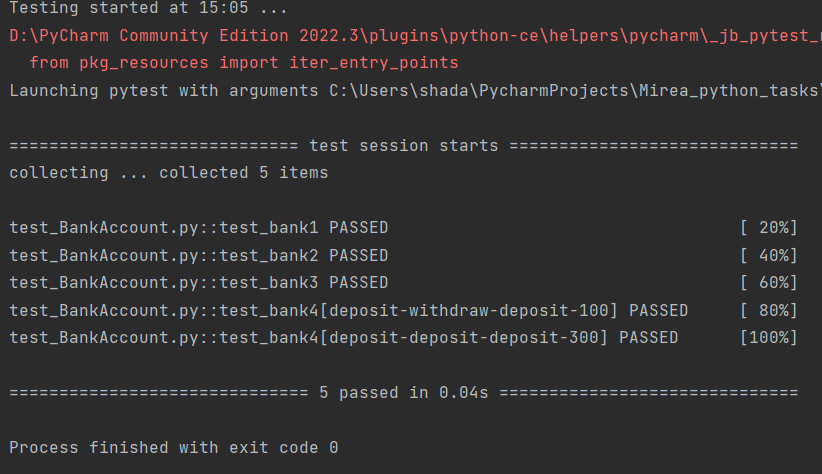

2.2. (уровень сложности: средний)

Выберите одну из программ, содержащих ошибки. Добавьте туда ввод со стороны пользователя. Добавьте макетный код для тестирования, с учетом такого ввода.

In [ ]:
def distance():
    x1 = int(input())
    y1 = int(input())
    x2 = int(input())
    y2 = int(input())
    return ((x2 - x1) ** 2 + (y2 - y1) ** 2) ** 0.5


def test_func(monkeypatch):
    inputs = [1, 2, 4, 6]

    def my_input():
        return inputs.pop()

    monkeypatch.setattr("builtins.input", my_input)
    assert distance() == 5.0

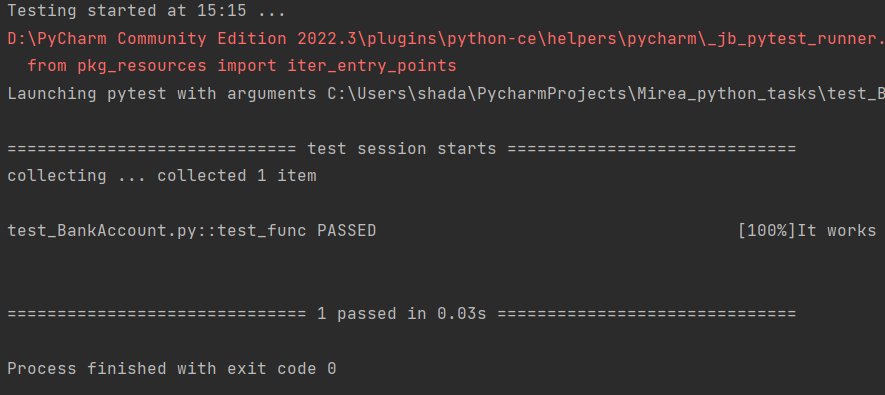

2.3. (уровень сложности: средний)

Научитесь работать с модулем coverage. Выберите одну из программ, содержащих ошибки. Получите статистику по покрытию операторов. Получите статистику по покрытию ветвей. Найдите случай, когда покрытие ветвей отличается от покрытия операторов. Постарайтесь изменить код исходной программы так, чтобы затруднить получение 100% покрытия. Найдите простой пример ошибки в выбранной программе, при полученном 100% покрытии. Реализуйте вывод статистики о покрытии в HTML-представлении с демонстрацией покрытия по строкам программы.

In [ ]:
import coverage, pytest


def distance(x1, y1, x2, y2):
    return ((x2 - x1) ** 2 + (y2 - y1) ** 2) ** 0.5


def triangle_type(x1, y1, x2, y2, x3, y3):
    a = distance(x1, y1, x2, y2)
    b = distance(x2, y2, x3, y3)
    c = distance(x3, y3, x1, y1)
    if a == b == c:
        return "равноcторонний"
    elif a == b or a == c or b == c:
        return "равнобедренный"
    else:
        return "разносторонний"


def test_triangle_type():
    assert triangle_type(0, 0, 2, 2, 1 - 3**0.5, 1 + 3**0.5) == "равноcторонний"
    assert triangle_type(0, 0, 0, 2, 2, 0) == "равнобедренный"
    assert triangle_type(0, 0, 0, 2, 1, 0) == "разносторонний"

Вот Разный процент покрытия:

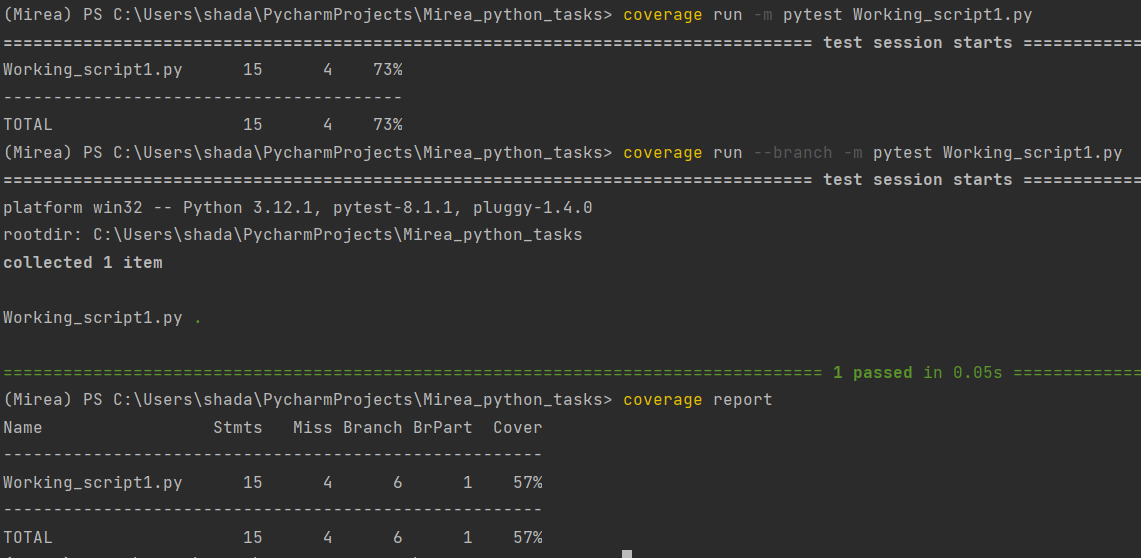

Вот 100 % покрытие:

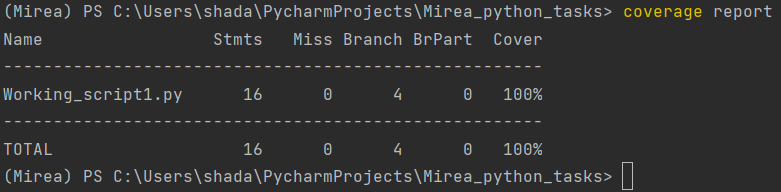

Но программу можно сломать введя стороны несуществующего треугольника

## 3 Мутационное тестирование

Прототип системы мутационного тестирования приведен ниже. Попробуйте разобраться в том, как работает этот код. Вам поможет документация к модулю ast.

Функция mut_test принимает на вход тестируемую функцию и функцию, осуществляющую тестирование с помощью assert.

In [ ]:
import random
from collections import defaultdict
import inspect
import ast


class Mutator(ast.NodeTransformer):
    def visit_Constant(self, node):
        # TODO
        return node


def mutate_code(src):
    tree = ast.parse(src)
    Mutator().visit(tree)
    return ast.unparse(tree)


def make_mutants(func, size):
    mutant = src = ast.unparse(ast.parse(inspect.getsource(func)))
    mutants = [src]
    while len(mutants) < size + 1:
        while mutant in mutants:
            mutant = mutate_code(src)
        mutants.append(mutant)
    return mutants[1:]


def mut_test(func, test, size=20):
    survived = []
    mutants = make_mutants(func, size)
    for mutant in mutants:
        try:
            exec(mutant, globals())
            test()
            survived.append(mutant)
        except:
            pass
    return survived

3.1. (уровень сложности: средний)

Выберите одну из программ, содержащих ошибки. Доработайте код мутационного тестирования так, чтобы генерировались программы-мутанты со случайными константами. Покажите, что при 100% покрытии тестами мутационное тестирование в состоянии находить ошибки.

In [ ]:
import random
from collections import defaultdict
import inspect
import ast


class Mutator(ast.NodeTransformer):
    def visit_Constant(self, node):
        if isinstance(node.value, int):
            node.value = node.value + random.randint(-10, 10)
        return node


def mutate_code(src):
    tree = ast.parse(src)
    Mutator().visit(tree)
    return ast.unparse(tree)


def make_mutants(func, size):
    mutant = src = ast.unparse(ast.parse(inspect.getsource(func)))
    mutants = [src]
    while len(mutants) < size + 1:
        while mutant in mutants:
            mutant = mutate_code(src)
        mutants.append(mutant)
    return mutants[1:]


def mut_test(func, test, size=20):
    survived = []
    mutants = make_mutants(func, size)
    for mutant in mutants:
        try:
            exec(mutant, globals())
            test()
            survived.append(mutant)
        except:
            pass
    return survived


def distance(x1, y1, x2, y2):
    return ((x2 - x1) ** 2 + (y2 - y1) ** 2) ** 0.5


src = ast.unparse(ast.parse(inspect.getsource(distance)))
print(mutate_code(src))

def distance(x1, y1, x2, y2):
    return ((x2 - x1) ** -2 + (y2 - y1) ** -3) ** 0.5


## 4 Контракты

4.1. (уровень сложности: средний)

Изучите работу с модулем deal. Для тестирования контрактов используйте pytest. Выберите одну из программ, содержащих ошибки. Добавьте к программе контракты pre, post, ensure, raises, reason, has.

In [ ]:
import pytest
import deal


@deal.pre(
    lambda x1, y1, x2, y2: isinstance(x1, float)
    and isinstance(y1, float)
    and isinstance(x2, float)
    and isinstance(y2, float)
)
@deal.post(lambda result: result >= 0)
@deal.ensure(
    lambda x1, y1, x2, y2, result: result == ((x2 - x1) ** 2 + (y2 - y1) ** 2) ** 0.5
)
@deal.reason(
    TypeError,
    lambda x1, x2, y1, y2: (
        isinstance(x1, (float)) == False
        and isinstance(y1, (float)) == False
        and isinstance(x2, (float)) == False
        and isinstance(y2, (float)) == False
    ),
)
@deal.raises(TypeError)
@deal.has()
def dist_new(x1, y1, x2, y2):
    return ((x2 - x1) ** 2 + (y2 - y1) ** 2) ** 0.5


def test_dist_new():
    assert dist_new(0.0, 0.0, 3.0, 4.0) == 5.0


def test_dist_incorrect():
    with pytest.raises(deal.PreContractE):
        pass

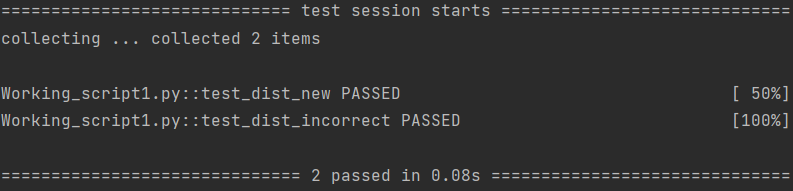

4.2. (уровень сложности: средний)

Перепишите класс банковского счета (6) с использованием контрактного программирования и, в частности, инвариантов класса. Продемонстрируйте, что реализованные инварианты класса действительно позволяют выявлять ошибки.

In [ ]:
import icontract
import pytest


class BankAccount:
    def __init__(self, account_number, balance=0):
        self.account_number = account_number
        self.balance = balance

    @icontract.require(lambda self, amount: amount > 0)
    @icontract.ensure(
        lambda self, amount, result: self.balance == old.self.balance + amount
    )
    def deposit(self, amount):
        self.balance += amount
        return f"{amount} средств успешно зачислены на счет {self.account_number}"

    @icontract.require(lambda self, amount: amount > 0 and amount <= self.balance)
    @icontract.ensure(
        lambda self, amount, result: self.balance == old.self.balance - amount
    )
    def withdraw(self, amount):
        self.balance -= amount
        return f"{amount} средств успешно сняты с счета {self.account_number}"

    @icontract.ensure(lambda self, result: self.balance >= 0)
    def check_balance(self):
        return f"Баланс счета {self.account_number}: {self.balance}"


def test_bank():
    account = BankAccount("2345", balance=187)

    with pytest.raises(icontract.ViolationError):
        account.withdraw(200)
    with pytest.raises(icontract.ViolationError):
        account.deposit(-50)

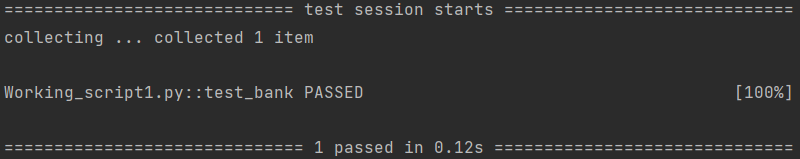

## 5 Тестирование на основе свойств

5.1. (уровень сложности: средний)

Научитесь работать с библиотекой hypothesis. Протестируйте функцию distance.

In [ ]:
from hypothesis import given, strategies as st
from math import dist as corr_distance


def distance(x1, y1, x2, y2):
    return ((x2 + x1) ** 2 - (y2 + y1) ** 2) ** 0.25


@given(x1=st.floats(), y1=st.floats(), x2=st.floats(), y2=st.floats())
def test_distance(x1, y1, x2, y2):
    result = distance(x1, y1, x2, y2)
    assert result == corr_distance([x1, y1], [x2, y2])


test_distance()

  + Exception Group Traceback (most recent call last):
  |   File "C:\Users\shada\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code
  |     exec(code_obj, self.user_global_ns, self.user_ns)
  |   File "C:\Users\shada\AppData\Local\Temp\ipykernel_15908\2839808442.py", line 13, in <module>
  |     test_distance()
  |   File "C:\Users\shada\AppData\Local\Temp\ipykernel_15908\2839808442.py", line 9, in test_distance
  |     def test_distance(x1, y1, x2, y2):
  |                    ^^^
  |   File "C:\Users\shada\anaconda3\Lib\site-packages\hypothesis\core.py", line 1638, in wrapped_test
  |     raise the_error_hypothesis_found
  | ExceptionGroup: Hypothesis found 2 distinct failures. (2 sub-exceptions)
  +-+---------------- 1 ----------------
    | Traceback (most recent call last):
    |   File "C:\Users\shada\AppData\Local\Temp\ipykernel_15908\2839808442.py", line 10, in test_distance
    |     result = distance(x1, y1, x2, y2)
    |              ^^^^^^

5.2. (уровень сложности: средний)

Реализуйте тестирование функций для RLE.

In [ ]:
def encode_rle(data):
    encoded = bytes()
    count = 0
    last_char = data[-1]
    for i in range(1, len(data) + 1):
        if data[i] == last_char:
            count += 1
        else:
            encoded.append(data[i])
            encoded.append(count)
            count = 1
            last_char = data[i]
    encoded.append(count)
    encoded.append(last_char)
    return bytes(encoded)


def decode_rle(data):
    decoded = bytes()
    i = 1
    while i < len(data):
        count = data[i - 1]
        char = data[i]
        decoded.extend([char] * count)
        i += 1
    return bytes(decoded)


@given(data=st.lists(st.floats(), min_size=4))
def test_rle(data):
    assert data == decode_rle(encode_rle(data))


test_rle()

  + Exception Group Traceback (most recent call last):
  |   File "C:\Users\shada\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code
  |     exec(code_obj, self.user_global_ns, self.user_ns)
  |   File "C:\Users\shada\AppData\Local\Temp\ipykernel_15908\2393664372.py", line 32, in <module>
  |     test_rle()
  |   File "C:\Users\shada\AppData\Local\Temp\ipykernel_15908\2393664372.py", line 29, in test_rle
  |     def test_rle(data):
  |                    ^^^
  |   File "C:\Users\shada\anaconda3\Lib\site-packages\hypothesis\core.py", line 1638, in wrapped_test
  |     raise the_error_hypothesis_found
  | ExceptionGroup: Hypothesis found 2 distinct failures. (2 sub-exceptions)
  +-+---------------- 1 ----------------
    | Traceback (most recent call last):
    |   File "C:\Users\shada\AppData\Local\Temp\ipykernel_15908\2393664372.py", line 30, in test_rle
    |     assert data == decode_rle(encode_rle(data))
    |                               ^^^^^^^^

5.3. (уровень сложности: высокий)

Реализуйте тестирование для деревьев выражений из предыдущей практики, для одного из «посетителей».

In [ ]:
class Node:
    pass


class Num(Node):
    def __init__(self, value):
        self.value = value


class Add(Node):
    def __init__(self, left, right):
        self.left = left
        self.right = right


class Mul(Node):
    def __init__(self, left, right):
        self.left = left
        self.right = right


class PrintVisitor:
    def visit(self, node):
        method_name = "visit_" + node.__class__.__name__.lower()
        visit_method = getattr(self, method_name)
        return visit_method(node)

    def visit_num(self, node):
        return str(node.value)

    def visit_add(self, node):
        return f"({self.visit(node.left)} + {self.visit(node.right)})"

    def visit_mul(self, node):
        return f"({self.visit(node.left)} * {self.visit(node.right)})"


@st.composite
def num_values(draw):
    return Num(draw(st.integers()))


@st.composite
def add_values(draw):
    left = draw(node_values())
    right = draw(node_values())
    return Add(left, right)


@st.composite
def mul_values(draw):
    left = draw(node_values())
    right = draw(node_values())
    return Mul(left, right)


@st.composite
def node_values(draw):
    return draw(st.one_of(num_values(), add_values(), mul_values()))


@given(node_values())
def test_print_visitor_output(node):
    visitor = PrintVisitor()
    assert eval(visitor.visit(node)) == eval(visitor.visit(node))
    print("Всё работает!")


test_print_visitor_output()

Всё работает!
Всё работает!
Всё работает!
Всё работает!
Всё работает!
Всё работает!
Всё работает!
Всё работает!
Всё работает!
Всё работает!
Всё работает!
Всё работает!
Всё работает!
Всё работает!
Всё работает!
Всё работает!
Всё работает!
Всё работает!
Всё работает!
Всё работает!
Всё работает!
Всё работает!
Всё работает!
Всё работает!
Всё работает!
Всё работает!
Всё работает!
Всё работает!
Всё работает!
Всё работает!
Всё работает!
Всё работает!
Всё работает!
Всё работает!
Всё работает!
Всё работает!
Всё работает!
Всё работает!
Всё работает!
Всё работает!
Всё работает!
Всё работает!
Всё работает!
Всё работает!
Всё работает!
Всё работает!
Всё работает!
Всё работает!
Всё работает!
Всё работает!
Всё работает!
Всё работает!
Всё работает!
Всё работает!
Всё работает!
Всё работает!
Всё работает!
Всё работает!
Всё работает!
Всё работает!
Всё работает!
Всё работает!
Всё работает!
Всё работает!
Всё работает!
Всё работает!
Всё работает!
Всё работает!
Всё работает!
Всё работает!
Всё работает!
Всё ра

5.4. (уровень сложности: высокий)

Используйте тестирование по модели для проверки реализации банковского счета (7).

In [ ]:
import sqlite3


class BankAccount:
    def __init__(self, account_number):
        self.account_number = account_number
        self.conn = sqlite3.connect("bank.db")
        self.cursor = self.conn.cursor()
        self.cursor.execute(
            "CREATE TABLE IF NOT EXISTS accounts (account_number INTEGER PRIMARY KEY, balance REAL)"
        )
        self.conn.commit()

    def deposit(self, amount):
        self.cursor.execute(
            "UPDATE accounts SET balance = balance + ? WHERE account_number = ?",
            (amount, self.account_number),
        )
        self.conn.commit()
        return f"{amount} средств успешно зачислены на счет {self.account_number}"

    def withdraw(self, amount):
        self.cursor.execute(
            "SELECT balance FROM accounts WHERE account_number = ?",
            (self.account_number,),
        )
        balance = self.cursor.fetchone()[0]
        self.cursor.execute(
            "UPDATE accounts SET balance = balance - ? WHERE account_number = ?",
            (amount, self.account_number),
        )
        self.conn.commit()
        return f"{amount} средств успешно сняты с счета {self.account_number}"

    def check_balance(self):
        self.cursor.execute(
            "SELECT balance FROM accounts WHERE account_number = ?",
            (self.account_number,),
        )
        balance = self.cursor.fetchone()[0]
        return f"Баланс счета {self.account_number}: {balance}"

    def close_account(self):
        self.cursor.execute(
            "DELETE FROM accounts WHERE account_number = ?", (self.account_number,)
        )
        self.conn.commit()
        return f"Счет {self.account_number} закрыт"

    def create_account(self, balance):
        self.cursor.execute(
            "INSERT INTO accounts (account_number, balance) VALUES (?, ?)",
            (self.account_number, balance),
        )
        self.conn.commit()
        return f"Счет {self.account_number} успешно создан"


@given(amount=st.floats(0, 1000))
def test_deposit(amount):
    account = BankAccount(account_number=12345)
    initial_balance = account.check_balance()

    account.deposit(amount)
    new_balance = account.check_balance()
    assert new_balance == f"Баланс счета 12345: {initial_balance + amount}"


@given(amount=st.floats(0, 1000))
def test_withdraw(amount):
    account = BankAccount(account_number=12345)
    initial_balance = account.check_balance()

    account.withdraw(amount)
    new_balance = account.check_balance()
    assert new_balance == f"Баланс счета 12345: {initial_balance - amount}"


def test_check_balance():
    account = BankAccount(account_number=12345)
    balance = account.check_balance()
    assert balance == "Баланс счета 12345"


def test_close_account():
    account = BankAccount(account_number=12345)
    response = account.close_account()
    assert response == f"Счет 12345 закрыт"


test_deposit()


TypeError: 'NoneType' object is not subscriptable

## 6 Формальная верификация

Формальная верификация головоломок из компьютерных игр

Одной из важных проблем, стоящих перед разработчиком компьютерных игр, является создание интересных головоломок, в которых отсутствуют тупиковые состояния (состояния, из которых нельзя достичь цели).

Формальную верификацию проведем следующим образом:

1 Реализовать игровую ситуацию в виде некоторого количества локаций с указанием перечня возможных действий в каждой из них.

2 Сгенерировать по реализованной игровой ситуации граф всех возможных игровых состояний, в котором ребра задают переходы из состояние в состояние.

3 Проанализировать граф состояний на предмет проверяемого игрового свойства.

Рассмотрим следующую игровую ситуацию из PuzzleGraph:

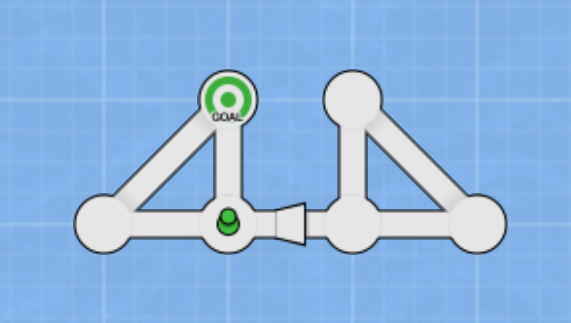

Здесь Goal означает целевое состояние, а состояние с двумя зелеными кругами обозначает старт. Справа от стартового состояния используется специальное ребро, по которому позволяется двигаться только в одну сторону, вправо.

Ниже приведено описание рассмотренной игровой ситуации на Питоне:

In [ ]:
# Функция перехода из комнаты в комнату
def go(room):
    def func(state):
        return dict(state, room=room)

    return func


# Структура игры. Комнаты и допустимые в них действия
game = {
    "room0": dict(left=go("room1"), up=go("room2"), right=go("room3")),
    "room1": dict(up=go("room2"), right=go("room0")),
    "room2": dict(),
    "room3": dict(up=go("room4"), right=go("room5")),
    "room4": dict(down=go("room3"), right=go("room5")),
    "room5": dict(up=go("room4"), left=go("room3")),
}

# Стартовое состояние
START_STATE = dict(room="room0")


def is_goal_state(state):
    """
    Проверить, является ли состояние целевым.
    """
    return state["room"] == "room2"


def get_current_room(state):
    """
    Выдать комнату, в которой находится игрок.
    """
    return state["room"]

6.1. (уровень сложности: средний)

Реализовать функцию make_model, которая по структуре игры и стартовому состоянию строит граф всех возможных состояний.

In [ ]:
# Функция перехода из комнаты в комнату
def go(room):
    def func(state):
        return dict(state, room=room)

    return func


# Структура игры. Комнаты и допустимые в них действия
game = {
    "room0": dict(left=go("room1"), up=go("room2"), right=go("room3")),
    "room1": dict(up=go("room2"), right=go("room0")),
    "room2": dict(),
    "room3": dict(up=go("room4"), right=go("room5")),
    "room4": dict(down=go("room3"), right=go("room5")),
    "room5": dict(up=go("room4"), left=go("room3")),
}


# По сути просто словарь в котором ключами могут быть игровые состояния (словари)
# Ключ - state, значение - connections (массив состояний в которые можно перейти)
class StatesGraph:
    def __init__(self):
        self.graph = []

    def add_state(self, state):
        self.graph.append((state, []))

    def add_connection(self, state, connection):
        self.get_connections(state).append(connection)

    def get_connections(self, state, default=None):
        for s, c in self.graph:
            if state == s:
                return c
        return default  # Default можно удалить

    def size(self):
        return len(self.graph)

    def states(self):
        return [state for state, connections in self.graph]

    def connections(self):
        return [connections for state, connections in self.graph]


# Стартовое состояние
START_STATE = dict(room="room0")


def is_goal_state(state):
    """
    Проверить, является ли состояние целевым.
    """
    return state["room"] == "room2"


def get_current_room(state):
    """
    Выдать комнату, в которой находится игрок.
    """
    return state["room"]


def create_state_graph(game_struct, starting_state):
    state_graph = StatesGraph()
    state_queue = [starting_state]  # Очередь из состояний которые нужно добавить в граф
    while len(state_queue) > 0:
        curr_state = state_queue.pop(0)
        state_graph.add_state(curr_state)
        curr_room = get_current_room(
            curr_state
        )  # Извлекаем номер комнаты из текущего игрового состояния, чтобы понять , какие действия можно вполнить в данной комнате
        for func in game_struct[
            curr_room
        ].values():  # перебор всех влзможных действий в комнате
            new_state = func(curr_state)
            if (
                new_state not in state_graph.states() and new_state not in state_queue
            ):  # Оба условия нужны, иначе не работает
                state_queue.append(new_state)
            state_graph.add_connection(curr_state, new_state)
    return state_graph


def print_dot(
    graph: StatesGraph, start_key
):  # Рисование графа, ввести результат в https://edotor.net/
    dead_ends = []  # find_dead_ends(graph) TODO
    print("digraph {")
    graph_keys = graph.states()
    for x in graph_keys:
        n = graph_keys.index(x)
        if x == start_key:  # условия для покраски
            print(f'n{n} [style="filled",fillcolor="dodgerblue",shape="circle"]')
        elif is_goal_state(x):
            print(f'n{n} [style="filled",fillcolor="green",shape="circle"]')
        elif x in dead_ends:
            print(f'n{n} [style="filled",fillcolor="red",shape="circle"]')
        else:
            print(f'n{n} [shape="circle"]')
    for x in graph_keys:  # Постройка рёбер
        n1 = graph_keys.index(x)
        for y in graph.get_connections(x):
            n2 = graph_keys.index(y)
            print(f"n{n1} -> n{n2}")
    print("}")


ans = create_state_graph(game, START_STATE)
print(print_dot(ans, START_STATE))

digraph {
n0 [style="filled",fillcolor="dodgerblue",shape="circle"]
n1 [shape="circle"]
n2 [style="filled",fillcolor="green",shape="circle"]
n3 [shape="circle"]
n4 [shape="circle"]
n5 [shape="circle"]
n0 -> n1
n0 -> n2
n0 -> n3
n1 -> n2
n1 -> n0
n3 -> n4
n3 -> n5
n4 -> n3
n4 -> n5
n5 -> n4
n5 -> n3
}
None


6.2. (уровень сложности: высокий)

Реализовать функцию find_dead_ends, которая выдает список тупиковых узлов графа. Вспомните тупиковые ситуации из известных вам компьютерных игр, где, иной раз, для дальнейшего прохождения нужно прибегать к старому сохранению или вводу специальных системных команд, и все потому, что был потерян важный для дальнейшего прохождения предмет или не совершено требуемое действие.

In [ ]:
# Функция перехода из комнаты в комнату
def go(room):
    def func(state):
        return dict(state, room=room)

    return func


# Структура игры. Комнаты и допустимые в них действия
game = {
    "room0": dict(left=go("room1"), up=go("room2"), right=go("room3")),
    "room1": dict(up=go("room2"), right=go("room0")),
    "room2": dict(),
    "room3": dict(up=go("room4"), right=go("room5")),
    "room4": dict(down=go("room3"), right=go("room5")),
    "room5": dict(up=go("room4"), left=go("room3")),
}


class StatesGraph:
    def __init__(self):
        self.graph = []

    def add_state(self, state):
        self.graph.append((state, []))

    def add_connection(self, state, connection):
        self.get_connections(state).append(connection)

    def get_connections(self, state, default=None):
        for s, c in self.graph:
            if state == s:
                return c
        return default

    def size(self):
        return len(self.graph)

    def states(self):
        return [state for state, connections in self.graph]

    def connections(self):
        return [connections for state, connections in self.graph]

    def get_accessible_states(
        self, starting_state
    ):  # Возвращает все достижимые вершины из текущей
        # Да да, ещё один поиск в ширину, аналогично созданию графа
        reached_states = []
        state_queue = [starting_state]
        while len(state_queue) > 0:
            curr_state = state_queue.pop(0)
            reached_states.append(curr_state)
            for new_state in self.get_connections(curr_state):
                if new_state not in reached_states and new_state not in state_queue:
                    state_queue.append(new_state)
        return reached_states


# Стартовое состояние
START_STATE = dict(room="room0")


def is_goal_state(state):
    """
    Проверить, является ли состояние целевым.
    """
    return state["room"] == "room2"


def get_current_room(state):
    """
    Выдать комнату, в которой находится игрок.
    """
    return state["room"]


def create_state_graph(game_struct, starting_state):
    state_graph = StatesGraph()
    state_queue = [starting_state]
    while len(state_queue) > 0:
        curr_state = state_queue.pop(0)
        state_graph.add_state(curr_state)
        curr_room = get_current_room(curr_state)
        for func in game_struct[curr_room].values():
            new_state = func(curr_state)
            if new_state not in state_graph.states() and new_state not in state_queue:
                state_queue.append(new_state)
            state_graph.add_connection(curr_state, new_state)
    return state_graph


def find_dead_ends(
    graph: StatesGraph,
):  # Поиск тупиков: Берём игровое состояние, смотрим список достижымых из него игровых состояний,
    # если в списке нет выигрышного состояния - значит это соотояние тупик, как и все достижимые из него
    states_to_check = graph.states()
    dead_ends = []
    while len(states_to_check) > 0:
        curr_state = states_to_check.pop(0)
        acc_states = graph.get_accessible_states(
            curr_state
        )  # Получение достижимых вершин
        if not any(
            (is_goal_state(state) for state in acc_states)
        ):  # Проверяет есть ли среди достижимых состояний выигрышное
            dead_ends.extend(acc_states)  # Можно использовать плюс вместо extend
            states_to_check = [
                state for state in states_to_check if state not in acc_states
            ]  # Удаляем из спика на проверку все достижимые вершины из тупиковой
    return dead_ends


def print_dot(graph: StatesGraph, start_key):
    dead_ends = find_dead_ends(graph)
    print("digraph {")
    graph_keys = graph.states()
    for x in graph_keys:
        n = graph_keys.index(x)
        if x == start_key:
            print(f'n{n} [style="filled",fillcolor="dodgerblue",shape="circle"]')
        elif is_goal_state(x):
            print(f'n{n} [style="filled",fillcolor="green",shape="circle"]')
        elif x in dead_ends:
            print(f'n{n} [style="filled",fillcolor="red",shape="circle"]')
        else:
            print(f'n{n} [shape="circle"]')
    for x in graph_keys:
        n1 = graph_keys.index(x)
        for y in graph.get_connections(x):
            n2 = graph_keys.index(y)
            print(f"n{n1} -> n{n2}")
    print("}")


ans = create_state_graph(game, START_STATE)
print(print_dot(ans, START_STATE))

digraph {
n0 [style="filled",fillcolor="dodgerblue",shape="circle"]
n1 [shape="circle"]
n2 [style="filled",fillcolor="green",shape="circle"]
n3 [style="filled",fillcolor="red",shape="circle"]
n4 [style="filled",fillcolor="red",shape="circle"]
n5 [style="filled",fillcolor="red",shape="circle"]
n0 -> n1
n0 -> n2
n0 -> n3
n1 -> n2
n1 -> n0
n3 -> n4
n3 -> n5
n4 -> n3
n4 -> n5
n5 -> n4
n5 -> n3
}
None


6.3. (уровень сложности: высокий)

Добавьте в одну из комнат room3-room5 рычаг, нажатие на который делает односторонний переход из room0 в room3 двусторонним.

In [ ]:
# Функция перехода из комнаты в комнату
def go(room):
    def func(state):
        return dict(state, room=room)

    return func


def go_if_lever(room):  # Совершает движение, нажат рычаг
    def func(state):
        if state["lever"]:
            return dict(state, room=room)
        else:
            return state

    return func


def pull_lever():  # Удивитесь, но нажимает на рычаг
    def func(state):
        return dict(state, lever=True)

    return func


# Всё, что нужно - немного изменить структуру игры
# Структура игры. Комнаты и допустимые в них действия
game = {
    "room0": dict(left=go("room1"), up=go("room2"), right=go("room3")),
    "room1": dict(up=go("room2"), right=go("room0")),
    "room2": dict(),
    "room3": dict(
        up=go("room4"),
        right=go("room5"),
        left=go_if_lever("room0"),  # Во новая функция
    ),
    "room4": dict(down=go("room3"), right=go("room5")),
    "room5": dict(
        up=go("room4"),
        left=go("room3"),
        lever=pull_lever(),  # И вот ещё
    ),
}


class StatesGraph:
    def __init__(self):
        self.graph = []

    def add_state(self, state):
        self.graph.append((state, []))

    def add_connection(self, state, connection):
        self.get_connections(state).append(connection)

    def get_connections(self, state, default=None):
        for s, c in self.graph:
            if state == s:
                return c
        return default

    def size(self):
        return len(self.graph)

    def states(self):
        return [state for state, connections in self.graph]

    def connections(self):
        return [connections for state, connections in self.graph]

    def get_accessible_states(self, starting_state):
        reached_states = []
        state_queue = [starting_state]
        while len(state_queue) > 0:
            curr_state = state_queue.pop(0)
            reached_states.append(curr_state)
            for new_state in self.get_connections(curr_state):
                if new_state not in reached_states and new_state not in state_queue:
                    state_queue.append(new_state)
        return reached_states


# Стартовое состояние
START_STATE = dict(
    room="room0", lever=False
)  # Теперь состояние также учитывает состояние рычага


def is_goal_state(state):
    """
    Проверить, является ли состояние целевым.
    """
    return state["room"] == "room2"


def get_current_room(state):
    """
    Выдать комнату, в которой находится игрок.
    """
    return state["room"]


def create_state_graph(game_struct, starting_state):
    state_graph = StatesGraph()
    state_queue = [starting_state]
    while len(state_queue) > 0:
        curr_state = state_queue.pop(0)
        state_graph.add_state(curr_state)
        curr_room = get_current_room(curr_state)
        for func in game_struct[curr_room].values():
            new_state = func(curr_state)  # Теперь curr_state может быть равно new_state
            if new_state not in state_graph.states() and new_state not in state_queue:
                state_queue.append(new_state)
            if new_state != curr_state:  # Чтобы не было петель
                state_graph.add_connection(curr_state, new_state)
    return state_graph


def find_dead_ends(graph: StatesGraph):
    states_to_check = graph.states()
    dead_ends = []
    while len(states_to_check) > 0:
        curr_state = states_to_check.pop(0)
        acc_states = graph.get_accessible_states(curr_state)
        if not any((is_goal_state(state) for state in acc_states)):
            dead_ends.extend(acc_states)
            states_to_check = [
                state for state in states_to_check if state not in acc_states
            ]
    return dead_ends


def print_dot(graph: StatesGraph, start_key):
    dead_ends = find_dead_ends(graph)
    print("digraph {")
    graph_keys = graph.states()
    for x in graph_keys:
        n = graph_keys.index(x)
        if x == start_key:
            print(f'n{n} [style="filled",fillcolor="dodgerblue",shape="circle"]')
        elif is_goal_state(x):
            print(f'n{n} [style="filled",fillcolor="green",shape="circle"]')
        elif x in dead_ends:
            print(f'n{n} [style="filled",fillcolor="red",shape="circle"]')
        else:
            print(f'n{n} [shape="circle"]')
    for x in graph_keys:
        n1 = graph_keys.index(x)
        for y in graph.get_connections(x):
            n2 = graph_keys.index(y)
            print(f"n{n1} -> n{n2}")
    print("}")


ans = create_state_graph(game, START_STATE)
print(print_dot(ans, START_STATE))

digraph {
n0 [style="filled",fillcolor="dodgerblue",shape="circle"]
n1 [shape="circle"]
n2 [style="filled",fillcolor="green",shape="circle"]
n3 [shape="circle"]
n4 [shape="circle"]
n5 [shape="circle"]
n6 [shape="circle"]
n7 [shape="circle"]
n8 [shape="circle"]
n9 [shape="circle"]
n10 [shape="circle"]
n11 [style="filled",fillcolor="green",shape="circle"]
n0 -> n1
n0 -> n2
n0 -> n3
n1 -> n2
n1 -> n0
n3 -> n4
n3 -> n5
n4 -> n3
n4 -> n5
n5 -> n4
n5 -> n3
n5 -> n6
n6 -> n7
n6 -> n8
n7 -> n8
n7 -> n6
n8 -> n7
n8 -> n6
n8 -> n9
n9 -> n10
n9 -> n11
n9 -> n8
n10 -> n11
n10 -> n9
}
None


6.4. (уровень сложности: высокий)

Придумайте минимальную игровую ситуацию, при которой будет наблюдаться комбинаторный взрыв для графа состояний.

Простой вариант функции печати графа в формате GraphViz:

In [ ]:
import random

NUMBER_CAP = 2


def create_number():  # Зарандомить все имеющиеся числа
    def func(state):
        return dict(state, numbers=[random.randint(1, 100) for _ in state["numbers"]])

    return func


def add_number():  # Добавить новое чилсо
    def func(state):
        if len(state["numbers"]) < NUMBER_CAP:
            return dict(state, numbers=state["numbers"] + [1])
        else:
            return state

    return func


# Структура игры. Комнаты и допустимые в них действия
game = {"room0": dict(do1=create_number(), do2=add_number())}


class StatesGraph:
    def __init__(self):
        self.graph = []

    def add_state(self, state):
        self.graph.append((state, []))

    def add_connection(self, state, connection):
        self.get_connections(state).append(connection)

    def get_connections(self, state, default=None):
        for s, c in self.graph:
            if state == s:
                return c
        return default

    def size(self):
        return len(self.graph)

    def states(self):
        return [state for state, connections in self.graph]

    def connections(self):
        return [connections for state, connections in self.graph]

    def get_accessible_states(self, starting_state):
        reached_states = []
        state_queue = [starting_state]
        while len(state_queue) > 0:
            curr_state = state_queue.pop(0)
            reached_states.append(curr_state)
            for new_state in self.get_connections(curr_state):
                if new_state not in reached_states and new_state not in state_queue:
                    state_queue.append(new_state)
        return reached_states


# Стартовое состояние
START_STATE = dict(room="room0", numbers=[1])  # У нас есть набор чисел, изначально одно


def is_goal_state(state):
    """
    Проверить, является ли состояние целевым.
    """
    return 100 in state["numbers"]


def get_current_room(state):
    """
    Выдать комнату, в которой находится игрок.
    """
    return state["room"]


def create_state_graph(game_struct, starting_state):
    state_graph = StatesGraph()
    state_queue = [starting_state]
    while len(state_queue) > 0:
        curr_state = state_queue.pop(0)
        state_graph.add_state(curr_state)
        curr_room = get_current_room(curr_state)
        for func in game_struct[curr_room].values():
            new_state = func(curr_state)
            if new_state not in state_graph.states() and new_state not in state_queue:
                state_queue.append(new_state)
            if new_state != curr_state:
                state_graph.add_connection(curr_state, new_state)
    return state_graph


def find_dead_ends(graph: StatesGraph):
    states_to_check = graph.states()
    dead_ends = []
    while len(states_to_check) > 0:
        curr_state = states_to_check.pop(0)
        acc_states = graph.get_accessible_states(curr_state)
        if not any((is_goal_state(state) for state in acc_states)):
            dead_ends.extend(acc_states)
            states_to_check = [
                state for state in states_to_check if state not in acc_states
            ]
    return dead_ends


def print_dot(graph: StatesGraph, start_key):
    dead_ends = find_dead_ends(graph)
    print("digraph {")
    graph_keys = graph.states()
    for x in graph_keys:
        n = graph_keys.index(x)
        if x == start_key:
            print(f'n{n} [style="filled",fillcolor="dodgerblue",shape="circle"]')
        elif is_goal_state(x):
            print(f'n{n} [style="filled",fillcolor="green",shape="circle"]')
        elif x in dead_ends:
            print(f'n{n} [style="filled",fillcolor="red",shape="circle"]')
        else:
            print(f'n{n} [shape="circle"]')
    for x in graph_keys:
        n1 = graph_keys.index(x)
        for y in graph.get_connections(x):
            n2 = graph_keys.index(y)
            print(f"n{n1} -> n{n2}")
    print("}")


ans = create_state_graph(game, START_STATE)
print(print_dot(ans, START_STATE))

digraph {
n0 [style="filled",fillcolor="dodgerblue",shape="circle"]
n1 [shape="circle"]
n2 [shape="circle"]
n3 [shape="circle"]
n4 [shape="circle"]
n5 [style="filled",fillcolor="green",shape="circle"]
n6 [shape="circle"]
n7 [shape="circle"]
n8 [shape="circle"]
n9 [shape="circle"]
n10 [shape="circle"]
n11 [shape="circle"]
n12 [shape="circle"]
n13 [shape="circle"]
n14 [shape="circle"]
n15 [shape="circle"]
n16 [shape="circle"]
n17 [shape="circle"]
n18 [shape="circle"]
n19 [shape="circle"]
n20 [shape="circle"]
n21 [shape="circle"]
n22 [shape="circle"]
n23 [shape="circle"]
n24 [shape="circle"]
n25 [shape="circle"]
n26 [shape="circle"]
n27 [shape="circle"]
n28 [shape="circle"]
n29 [shape="circle"]
n30 [shape="circle"]
n31 [shape="circle"]
n32 [shape="circle"]
n33 [shape="circle"]
n34 [shape="circle"]
n35 [shape="circle"]
n36 [shape="circle"]
n37 [shape="circle"]
n38 [shape="circle"]
n39 [shape="circle"]
n40 [shape="circle"]
n41 [shape="circle"]
n42 [shape="circle"]
n43 [shape="circle"]
n44 [

Вот как выглядит вывод функции print_dot:

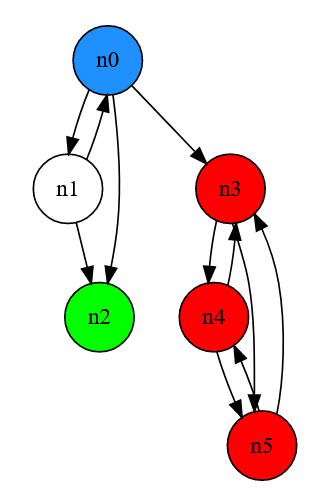

Вывод для пункта 4 с рычагом:

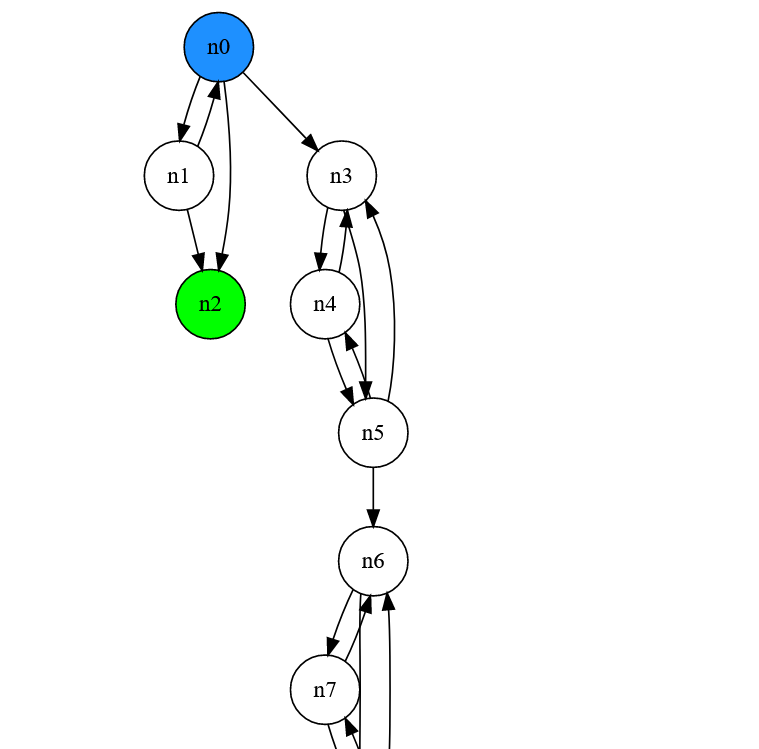
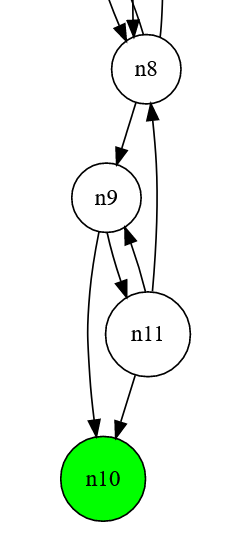

6.5. (уровень сложности: высокий)

Есть простая игра The Teeny Tiny Mansion (TTTM), описание которой приведено здесь. В этой игре имеется 2 персонажа (Алиса и Боб), которыми можно поочередно управлять, 4 комнаты, 3 двери и 3 ключа. Персонажи могут брать ключи и передавать их друг другу. Целью является привести Алису в красную комнату, а Боба — в голубую комнату.

В качестве стартового состояния используйте:

START_STATE = dict(
    player='alice',
    alice_room='west room',
    bob_room='east room',
    red_key='east room',
    blue_key='west room',
    green_key='east room'
)

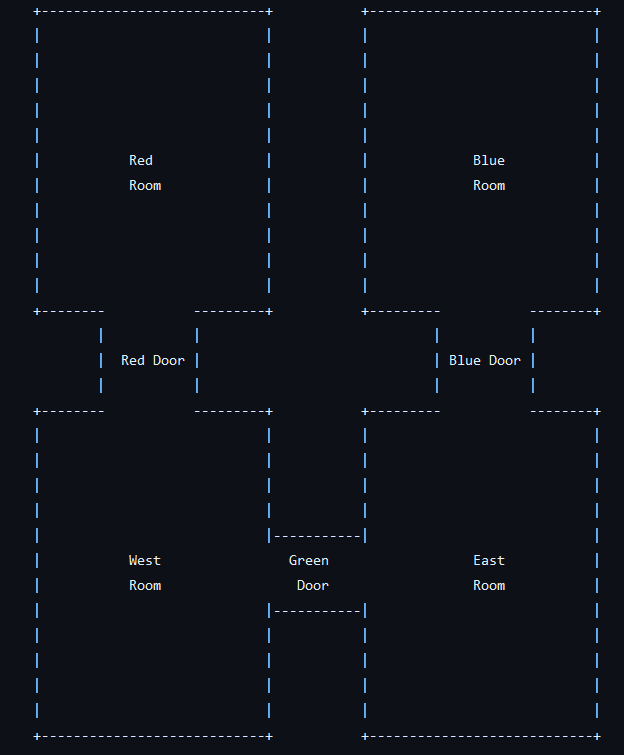

Реализовать все пункты предыдущей задачи для TTTM.

In [ ]:
# Тут персонажи могут заходить не в свои комнаты


def change_character():
    def func(state):
        if state["player"] == "alice":
            return dict(state, player="bob")
        else:
            return dict(state, player="alice")

    return func


def go_through(door_color):
    def func(state):
        if state[f"{door_color}_key"] == state["player"]:
            if door_color in ["red", "blue"]:
                if state["player"] == "alice":
                    return dict(state, alice_room=f"{door_color}_room")
                else:
                    return dict(state, bob_room=f"{door_color}_room")
            else:
                if state["player"] == "alice":
                    if state["alice_room"] == "west_room":
                        return dict(state, alice_room="east_room")
                    else:
                        return dict(state, alice_room="west_room")
                else:
                    if state["bob_room"] == "west_room":
                        return dict(state, bob_room="east_room")
                    else:
                        return dict(state, bob_room="west_room")
        else:
            return state

    return func


def pick(key_color):
    def func(state):
        if state[f"{key_color}_key"] == get_current_room(state):
            match key_color:
                case "red":
                    return dict(state, red_key=state["player"])
                case "blue":
                    return dict(state, blue_key=state["player"])
                case "green":
                    return dict(state, green_key=state["player"])
        else:
            return state

    return func


def drop(key_color):
    def func(state):
        if state[f"{key_color}_key"] == state["player"]:
            match key_color:
                case "red":
                    return dict(state, red_key=get_current_room(state))
                case "blue":
                    return dict(state, blue_key=get_current_room(state))
                case "green":
                    return dict(state, green_key=get_current_room(state))
        else:
            return state

    return func


# Структура игры. Комнаты и допустимые в них действия
game = {
    "west_room": [
        go_through("red"),
        go_through("green"),
        change_character(),
        pick("green"),
        pick("red"),
        pick("blue"),
        drop("green"),
        drop("red"),
        drop("blue"),
    ],
    "east_room": [
        go_through("blue"),
        go_through("green"),
        change_character(),
        pick("green"),
        pick("red"),
        pick("blue"),
        drop("green"),
        drop("red"),
        drop("blue"),
    ],
    "red_room": [change_character()],
    "blue_room": [change_character()],
}


class StatesGraph:
    def __init__(self):
        self.graph = []

    def add_state(self, state):
        self.graph.append((state, []))

    def add_connection(self, state, connection):
        self.get_connections(state).append(connection)

    def get_connections(self, state, default=None):
        for s, c in self.graph:
            if state == s:
                return c
        return default

    def size(self):
        return len(self.graph)

    def states(self):
        return [state for state, connections in self.graph]

    def connections(self):
        return [connections for state, connections in self.graph]

    def get_accessible_states(self, starting_state):
        reached_states = []
        state_queue = [starting_state]
        while len(state_queue) > 0:
            curr_state = state_queue.pop(0)
            reached_states.append(curr_state)
            for new_state in self.get_connections(curr_state):
                if new_state not in reached_states and new_state not in state_queue:
                    state_queue.append(new_state)
        return reached_states


# Стартовое состояние
START_STATE = dict(
    player="alice",
    alice_room="west_room",
    bob_room="east_room",
    red_key="east_room",
    blue_key="west_room",
    green_key="east_room",
)


def is_goal_state(state):
    """
    Проверить, является ли состояние целевым.
    """
    return state["alice_room"] == "red_room" and state["bob_room"] == "blue_room"


def get_current_room(state):
    """
    Выдать комнату, в которой находится игрок.
    """
    return state[f"{state['player']}_room"]


def create_state_graph(game_struct, starting_state):
    state_graph = StatesGraph()
    state_queue = [starting_state]
    while len(state_queue) > 0:
        curr_state = state_queue.pop(0)
        state_graph.add_state(curr_state)
        curr_room = get_current_room(curr_state)
        for func in game_struct[curr_room]:
            new_state = func(curr_state)
            if new_state not in state_graph.states() and new_state not in state_queue:
                state_queue.append(new_state)
            if new_state != curr_state:
                state_graph.add_connection(curr_state, new_state)
    return state_graph


def find_dead_ends(graph: StatesGraph):
    states_to_check = graph.states()
    dead_ends = []
    while len(states_to_check) > 0:
        curr_state = states_to_check.pop(0)
        acc_states = graph.get_accessible_states(curr_state)
        if not any((is_goal_state(state) for state in acc_states)):
            dead_ends.extend(acc_states)
            states_to_check = [
                state for state in states_to_check if state not in acc_states
            ]
    return dead_ends


def print_dot(graph: StatesGraph, start_key):
    dead_ends = find_dead_ends(graph)
    print("digraph {")
    graph_keys = graph.states()
    for x in graph_keys:
        n = graph_keys.index(x)
        if x == start_key:
            print(f'n{n} [style="filled",fillcolor="dodgerblue",shape="circle"]')
        elif is_goal_state(x):
            print(f'n{n} [style="filled",fillcolor="green",shape="circle"]')
        elif x in dead_ends:
            print(f'n{n} [style="filled",fillcolor="red",shape="circle"]')
        else:
            print(f'n{n} [shape="circle"]')
    for x in graph_keys:
        n1 = graph_keys.index(x)
        for y in graph.get_connections(x):
            n2 = graph_keys.index(y)
            print(f"n{n1} -> n{n2}")
    print("}")


ans = create_state_graph(game, START_STATE)
print(print_dot(ans, START_STATE))

digraph {
n0 [style="filled",fillcolor="dodgerblue",shape="circle"]
n1 [shape="circle"]
n2 [shape="circle"]
n3 [shape="circle"]
n4 [shape="circle"]
n5 [shape="circle"]
n6 [shape="circle"]
n7 [shape="circle"]
n8 [shape="circle"]
n9 [shape="circle"]
n10 [shape="circle"]
n11 [shape="circle"]
n12 [shape="circle"]
n13 [shape="circle"]
n14 [shape="circle"]
n15 [shape="circle"]
n16 [shape="circle"]
n17 [shape="circle"]
n18 [shape="circle"]
n19 [shape="circle"]
n20 [shape="circle"]
n21 [shape="circle"]
n22 [shape="circle"]
n23 [shape="circle"]
n24 [shape="circle"]
n25 [shape="circle"]
n26 [style="filled",fillcolor="red",shape="circle"]
n27 [shape="circle"]
n28 [shape="circle"]
n29 [shape="circle"]
n30 [shape="circle"]
n31 [shape="circle"]
n32 [shape="circle"]
n33 [shape="circle"]
n34 [style="filled",fillcolor="red",shape="circle"]
n35 [shape="circle"]
n36 [shape="circle"]
n37 [shape="circle"]
n38 [shape="circle"]
n39 [shape="circle"]
n40 [shape="circle"]
n41 [shape="circle"]
n42 [style="filled

In [ ]:
# Тут персонажи не могут заходить не в свои комнаты


def change_character():
    def func(state):
        if state["player"] == "alice":
            return dict(state, player="bob")
        else:
            return dict(state, player="alice")

    return func


def go_through(door_color):
    def func(state):
        if state[f"{door_color}_key"] == state["player"]:
            if door_color in ["red", "blue"]:
                if state["player"] == "alice" and door_color == "red":
                    return dict(state, alice_room=f"{door_color}_room")
                elif state["player"] == "bob" and door_color == "blue":
                    return dict(state, bob_room=f"{door_color}_room")
                else:
                    return state
            else:
                if state["player"] == "alice":
                    if state["alice_room"] == "west_room":
                        return dict(state, alice_room="east_room")
                    else:
                        return dict(state, alice_room="west_room")
                else:
                    if state["bob_room"] == "west_room":
                        return dict(state, bob_room="east_room")
                    else:
                        return dict(state, bob_room="west_room")
        else:
            return state

    return func


def pick(key_color):
    def func(state):
        if state[f"{key_color}_key"] == get_current_room(state):
            match key_color:
                case "red":
                    return dict(state, red_key=state["player"])
                case "blue":
                    return dict(state, blue_key=state["player"])
                case "green":
                    return dict(state, green_key=state["player"])
        else:
            return state

    return func


def drop(key_color):
    def func(state):
        if state[f"{key_color}_key"] == state["player"]:
            match key_color:
                case "red":
                    return dict(state, red_key=get_current_room(state))
                case "blue":
                    return dict(state, blue_key=get_current_room(state))
                case "green":
                    return dict(state, green_key=get_current_room(state))
        else:
            return state

    return func


# Структура игры. Комнаты и допустимые в них действия
game = {
    "west_room": [
        go_through("red"),
        go_through("green"),
        change_character(),
        pick("green"),
        pick("red"),
        pick("blue"),
        drop("green"),
        drop("red"),
        drop("blue"),
    ],
    "east_room": [
        go_through("blue"),
        go_through("green"),
        change_character(),
        pick("green"),
        pick("red"),
        pick("blue"),
        drop("green"),
        drop("red"),
        drop("blue"),
    ],
    "red_room": [change_character()],
    "blue_room": [change_character()],
}


class StatesGraph:
    def __init__(self):
        self.graph = []

    def add_state(self, state):
        self.graph.append((state, []))

    def add_connection(self, state, connection):
        self.get_connections(state).append(connection)

    def get_connections(self, state, default=None):
        for s, c in self.graph:
            if state == s:
                return c
        return default

    def size(self):
        return len(self.graph)

    def states(self):
        return [state for state, connections in self.graph]

    def connections(self):
        return [connections for state, connections in self.graph]

    def get_accessible_states(self, starting_state):
        reached_states = []
        state_queue = [starting_state]
        while len(state_queue) > 0:
            curr_state = state_queue.pop(0)
            reached_states.append(curr_state)
            for new_state in self.get_connections(curr_state):
                if new_state not in reached_states and new_state not in state_queue:
                    state_queue.append(new_state)
        return reached_states


# Стартовое состояние
START_STATE = dict(
    player="alice",
    alice_room="west_room",
    bob_room="east_room",
    red_key="east_room",
    blue_key="west_room",
    green_key="east_room",
)


def is_goal_state(state):
    """
    Проверить, является ли состояние целевым.
    """
    return state["alice_room"] == "red_room" and state["bob_room"] == "blue_room"


def get_current_room(state):
    """
    Выдать комнату, в которой находится игрок.
    """
    return state[f"{state['player']}_room"]


def create_state_graph(game_struct, starting_state):
    state_graph = StatesGraph()
    state_queue = [starting_state]
    while len(state_queue) > 0:
        curr_state = state_queue.pop(0)
        state_graph.add_state(curr_state)
        curr_room = get_current_room(curr_state)
        for func in game_struct[curr_room]:
            new_state = func(curr_state)
            if new_state not in state_graph.states() and new_state not in state_queue:
                state_queue.append(new_state)
            if new_state != curr_state:
                state_graph.add_connection(curr_state, new_state)
    return state_graph


def find_dead_ends(graph: StatesGraph):
    states_to_check = graph.states()
    dead_ends = []
    while len(states_to_check) > 0:
        curr_state = states_to_check.pop(0)
        acc_states = graph.get_accessible_states(curr_state)
        if not any((is_goal_state(state) for state in acc_states)):
            dead_ends.extend(acc_states)
            states_to_check = [
                state for state in states_to_check if state not in acc_states
            ]
    return dead_ends


def print_dot(graph: StatesGraph, start_key):
    dead_ends = find_dead_ends(graph)
    print("digraph {")
    graph_keys = graph.states()
    for x in graph_keys:
        n = graph_keys.index(x)
        if x == start_key:
            print(f'n{n} [style="filled",fillcolor="dodgerblue",shape="circle"]')
        elif is_goal_state(x):
            print(f'n{n} [style="filled",fillcolor="green",shape="circle"]')
        elif x in dead_ends:
            print(f'n{n} [style="filled",fillcolor="red",shape="circle"]')
        else:
            print(f'n{n} [shape="circle"]')
    for x in graph_keys:
        n1 = graph_keys.index(x)
        for y in graph.get_connections(x):
            n2 = graph_keys.index(y)
            print(f"n{n1} -> n{n2}")
    print("}")


def find_shortest_solution(graph, staring_state):
    pass


ans = create_state_graph(game, START_STATE)
print(print_dot(ans, START_STATE))

digraph {
n0 [style="filled",fillcolor="dodgerblue",shape="circle"]
n1 [shape="circle"]
n2 [shape="circle"]
n3 [shape="circle"]
n4 [shape="circle"]
n5 [shape="circle"]
n6 [shape="circle"]
n7 [shape="circle"]
n8 [shape="circle"]
n9 [shape="circle"]
n10 [shape="circle"]
n11 [shape="circle"]
n12 [shape="circle"]
n13 [shape="circle"]
n14 [shape="circle"]
n15 [shape="circle"]
n16 [shape="circle"]
n17 [shape="circle"]
n18 [shape="circle"]
n19 [shape="circle"]
n20 [shape="circle"]
n21 [shape="circle"]
n22 [shape="circle"]
n23 [shape="circle"]
n24 [shape="circle"]
n25 [shape="circle"]
n26 [shape="circle"]
n27 [shape="circle"]
n28 [shape="circle"]
n29 [shape="circle"]
n30 [shape="circle"]
n31 [shape="circle"]
n32 [shape="circle"]
n33 [style="filled",fillcolor="red",shape="circle"]
n34 [shape="circle"]
n35 [shape="circle"]
n36 [shape="circle"]
n37 [shape="circle"]
n38 [shape="circle"]
n39 [shape="circle"]
n40 [shape="circle"]
n41 [shape="circle"]
n42 [shape="circle"]
n43 [shape="circle"]
n44 [sh

6.6. (уровень сложности: высокий)

Реализовать функцию подсчета кратчайшего числа шагов, за которые игру можно успешно завершить.

In [ ]:
def change_character():
    def func(state):
        if state["player"] == "alice":
            return dict(state, player="bob")
        else:
            return dict(state, player="alice")

    return func


def go_through(door_color):
    def func(state):
        if state[f"{door_color}_key"] == state["player"]:
            if door_color in ["red", "blue"]:
                if state["player"] == "alice" and door_color == "red":
                    return dict(state, alice_room=f"{door_color}_room")
                elif state["player"] == "bob" and door_color == "blue":
                    return dict(state, bob_room=f"{door_color}_room")
                else:
                    return state
            else:
                if state["player"] == "alice":
                    if state["alice_room"] == "west_room":
                        return dict(state, alice_room="east_room")
                    else:
                        return dict(state, alice_room="west_room")
                else:
                    if state["bob_room"] == "west_room":
                        return dict(state, bob_room="east_room")
                    else:
                        return dict(state, bob_room="west_room")
        else:
            return state

    return func


def pick(key_color):
    def func(state):
        if state[f"{key_color}_key"] == get_current_room(state):
            match key_color:
                case "red":
                    return dict(state, red_key=state["player"])
                case "blue":
                    return dict(state, blue_key=state["player"])
                case "green":
                    return dict(state, green_key=state["player"])
        else:
            return state

    return func


def drop(key_color):
    def func(state):
        if state[f"{key_color}_key"] == state["player"]:
            match key_color:
                case "red":
                    return dict(state, red_key=get_current_room(state))
                case "blue":
                    return dict(state, blue_key=get_current_room(state))
                case "green":
                    return dict(state, green_key=get_current_room(state))
        else:
            return state

    return func


# Структура игры. Комнаты и допустимые в них действия
game = {
    "west_room": [
        go_through("red"),
        go_through("green"),
        change_character(),
        pick("green"),
        pick("red"),
        pick("blue"),
        drop("green"),
        drop("red"),
        drop("blue"),
    ],
    "east_room": [
        go_through("blue"),
        go_through("green"),
        change_character(),
        pick("green"),
        pick("red"),
        pick("blue"),
        drop("green"),
        drop("red"),
        drop("blue"),
    ],
    "red_room": [change_character()],
    "blue_room": [change_character()],
}


class StatesGraph:
    def __init__(self):
        self.graph = []

    def add_state(self, state):
        self.graph.append((state, []))

    def add_connection(self, state, connection):
        self.get_connections(state).append(connection)

    def get_connections(self, state, default=None):
        for s, c in self.graph:
            if state == s:
                return c
        return default

    def size(self):
        return len(self.graph)

    def states(self):
        return [state for state, connections in self.graph]

    def connections(self):
        return [connections for state, connections in self.graph]

    def get_accessible_states(self, starting_state):
        reached_states = []
        state_queue = [starting_state]
        while len(state_queue) > 0:
            curr_state = state_queue.pop(0)
            reached_states.append(curr_state)
            for new_state in self.get_connections(curr_state):
                if new_state not in reached_states and new_state not in state_queue:
                    state_queue.append(new_state)
        return reached_states


# Стартовое состояние
START_STATE = dict(
    player="alice",
    alice_room="west_room",
    bob_room="east_room",
    red_key="east_room",
    blue_key="west_room",
    green_key="east_room",
)


def is_goal_state(state):
    """
    Проверить, является ли состояние целевым.
    """
    return state["alice_room"] == "red_room" and state["bob_room"] == "blue_room"


def get_current_room(state):
    """
    Выдать комнату, в которой находится игрок.
    """
    return state[f"{state['player']}_room"]


def create_state_graph(game_struct, starting_state):
    state_graph = StatesGraph()
    state_queue = [starting_state]
    while len(state_queue) > 0:
        curr_state = state_queue.pop(0)
        state_graph.add_state(curr_state)
        curr_room = get_current_room(curr_state)
        for func in game_struct[curr_room]:
            new_state = func(curr_state)
            if new_state not in state_graph.states() and new_state not in state_queue:
                state_queue.append(new_state)
            if new_state != curr_state:
                state_graph.add_connection(curr_state, new_state)
    return state_graph


def find_dead_ends(graph: StatesGraph):
    states_to_check = graph.states()
    dead_ends = []
    while len(states_to_check) > 0:
        curr_state = states_to_check.pop(0)
        acc_states = graph.get_accessible_states(curr_state)
        if not any((is_goal_state(state) for state in acc_states)):
            dead_ends.extend(acc_states)
            states_to_check = [
                state for state in states_to_check if state not in acc_states
            ]
    return dead_ends


def print_dot(graph: StatesGraph, start_key):
    dead_ends = find_dead_ends(graph)
    print("digraph {")
    graph_keys = graph.states()
    for x in graph_keys:
        n = graph_keys.index(x)
        if x == start_key:
            print(f'n{n} [style="filled",fillcolor="dodgerblue",shape="circle"]')
        elif is_goal_state(x):
            print(f'n{n} [style="filled",fillcolor="green",shape="circle"]')
        elif x in dead_ends:
            print(f'n{n} [style="filled",fillcolor="red",shape="circle"]')
        else:
            print(f'n{n} [shape="circle"]')
    for x in graph_keys:
        n1 = graph_keys.index(x)
        for y in graph.get_connections(x):
            n2 = graph_keys.index(y)
            print(f"n{n1} -> n{n2}")
    print("}")


def find_shortest_solution(graph, starting_state):
    reached_states = []
    state_queue = [(starting_state, 0)]
    while len(state_queue) > 0:
        curr_state, dist = state_queue.pop(0)
        if is_goal_state(curr_state):
            return dist
        reached_states.append(curr_state)
        for new_state in graph.get_connections(curr_state):
            if new_state not in reached_states and new_state not in state_queue:
                state_queue.append((new_state, dist + 1))
    return 0


ans = create_state_graph(game, START_STATE)
print(find_shortest_solution(ans, START_STATE))

11


6.7. (уровень сложности: хакер)

Провести верификацию для общего случая: Алиса, Боб и 3 ключа случайно располагаются в западной и восточной комнатах.

Пример вывода графа состояний:

In [ ]:
def change_character():
    def func(state):
        if state["player"] == "alice":
            return dict(state, player="bob")
        else:
            return dict(state, player="alice")

    return func


def go_through(door_color):
    def func(state):
        if state[f"{door_color}_key"] == state["player"]:
            if door_color in ["red", "blue"]:
                if state["player"] == "alice" and door_color == "red":
                    return dict(state, alice_room=f"{door_color}_room")
                elif state["player"] == "bob" and door_color == "blue":
                    return dict(state, bob_room=f"{door_color}_room")
                else:
                    return state
            else:
                if state["player"] == "alice":
                    if state["alice_room"] == "west_room":
                        return dict(state, alice_room="east_room")
                    else:
                        return dict(state, alice_room="west_room")
                else:
                    if state["bob_room"] == "west_room":
                        return dict(state, bob_room="east_room")
                    else:
                        return dict(state, bob_room="west_room")
        else:
            return state

    return func


def pick(key_color):
    def func(state):
        if state[f"{key_color}_key"] == get_current_room(state):
            match key_color:
                case "red":
                    return dict(state, red_key=state["player"])
                case "blue":
                    return dict(state, blue_key=state["player"])
                case "green":
                    return dict(state, green_key=state["player"])
        else:
            return state

    return func


def drop(key_color):
    def func(state):
        if state[f"{key_color}_key"] == state["player"]:
            match key_color:
                case "red":
                    return dict(state, red_key=get_current_room(state))
                case "blue":
                    return dict(state, blue_key=get_current_room(state))
                case "green":
                    return dict(state, green_key=get_current_room(state))
        else:
            return state

    return func


# Структура игры. Комнаты и допустимые в них действия
game = {
    "west_room": [
        go_through("red"),
        go_through("green"),
        change_character(),
        pick("green"),
        pick("red"),
        pick("blue"),
        drop("green"),
        drop("red"),
        drop("blue"),
    ],
    "east_room": [
        go_through("blue"),
        go_through("green"),
        change_character(),
        pick("green"),
        pick("red"),
        pick("blue"),
        drop("green"),
        drop("red"),
        drop("blue"),
    ],
    "red_room": [change_character()],
    "blue_room": [change_character()],
}


class StatesGraph:
    def __init__(self):
        self.graph = []

    def add_state(self, state):
        self.graph.append((state, []))

    def add_connection(self, state, connection):
        self.get_connections(state).append(connection)

    def get_connections(self, state, default=None):
        for s, c in self.graph:
            if state == s:
                return c
        return default

    def size(self):
        return len(self.graph)

    def states(self):
        return [state for state, connections in self.graph]

    def connections(self):
        return [connections for state, connections in self.graph]

    def get_accessible_states(self, starting_state):
        reached_states = []
        state_queue = [starting_state]
        while len(state_queue) > 0:
            curr_state = state_queue.pop(0)
            reached_states.append(curr_state)
            for new_state in self.get_connections(curr_state):
                if new_state not in reached_states and new_state not in state_queue:
                    state_queue.append(new_state)
        return reached_states


# Стартовое состояние
START_STATE = dict(
    player="alice",
    alice_room="west_room",
    bob_room="west_room",
    red_key="east_room",
    blue_key="east_room",
    green_key="east_room",
)


def is_goal_state(state):
    """
    Проверить, является ли состояние целевым.
    """
    return state["alice_room"] == "red_room" and state["bob_room"] == "blue_room"


def get_current_room(state):
    """
    Выдать комнату, в которой находится игрок.
    """
    return state[f"{state['player']}_room"]


def create_state_graph(game_struct, starting_state):
    state_graph = StatesGraph()
    state_queue = [starting_state]
    while len(state_queue) > 0:
        curr_state = state_queue.pop(0)
        state_graph.add_state(curr_state)
        curr_room = get_current_room(curr_state)
        for func in game_struct[curr_room]:
            new_state = func(curr_state)
            if new_state not in state_graph.states() and new_state not in state_queue:
                state_queue.append(new_state)
            if new_state != curr_state:
                state_graph.add_connection(curr_state, new_state)
    return state_graph


def find_dead_ends(graph: StatesGraph):
    states_to_check = graph.states()
    dead_ends = []
    while len(states_to_check) > 0:
        curr_state = states_to_check.pop(0)
        acc_states = graph.get_accessible_states(curr_state)
        if not any((is_goal_state(state) for state in acc_states)):
            dead_ends.extend(acc_states)
            states_to_check = [
                state for state in states_to_check if state not in acc_states
            ]
    return dead_ends


def print_dot(graph: StatesGraph, start_key):
    dead_ends = find_dead_ends(graph)
    print("digraph {")
    graph_keys = graph.states()
    for x in graph_keys:
        n = graph_keys.index(x)
        if x == start_key:
            print(f'n{n} [style="filled",fillcolor="dodgerblue",shape="circle"]')
        elif is_goal_state(x):
            print(f'n{n} [style="filled",fillcolor="green",shape="circle"]')
        elif x in dead_ends:
            print(f'n{n} [style="filled",fillcolor="red",shape="circle"]')
        else:
            print(f'n{n} [shape="circle"]')
    for x in graph_keys:
        n1 = graph_keys.index(x)
        for y in graph.get_connections(x):
            n2 = graph_keys.index(y)
            print(f"n{n1} -> n{n2}")
    print("}")


def find_shortest_solution(graph, starting_state):
    reached_states = []
    state_queue = [(starting_state, 0)]
    while len(state_queue) > 0:
        curr_state, dist = state_queue.pop(0)
        if is_goal_state(curr_state):
            return dist
        reached_states.append(curr_state)
        for new_state in graph.get_connections(curr_state):
            if new_state not in reached_states and new_state not in state_queue:
                state_queue.append((new_state, dist + 1))
    return 0


ans = create_state_graph(game, START_STATE)
print(print_dot(ans, START_STATE))
print(find_shortest_solution(ans, START_STATE))

digraph {
n0 [style="filled",fillcolor="dodgerblue",shape="circle"]
n1 [style="filled",fillcolor="red",shape="circle"]
n0 -> n1
n1 -> n0
}
None
0
